# Tutorial: Model Builder - A Data-Centric Way to Train your own Obejct Detection Models

# 1. Data Preparation

In [1]:
!python -m pip install git+https://github.com/cqels/vision.git --force
%cd mmdetection/

  Cloning https://github.com/cqels/vision.git to /tmp/pip-req-build-1lpy3jxw
  Running command git clone --filter=blob:none --quiet https://github.com/cqels/vision.git /tmp/pip-req-build-1lpy3jxw
  Resolved https://github.com/cqels/vision.git to commit 9e5de93384b5803e7bd127ef79075b0c118d745e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached funcy-2.0-py2.py3-none-any.whl.metadata (5.9 kB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl.metadata (12 kB)
  Using cached humanfriendly-10.0-py2.py3-none-any.whl.metadata (9.2 kB)
Using cached coloredlogs-15.0.1-py2.py3-none-any.whl (46 kB)
Using cached funcy-2.0-py2.py3-none-any.whl (30 kB)
Using cached humanfriendly-10.0-py2.py3-none-any.whl (86 kB)
  Created wheel for vision_utils: filename=vision_utils-0.0.1-py3-none-any.whl size=31839 sha256=1b2eca710f92930a381975d152312ec26c088ea3efd901f3a8bb72d5f700c05a
  Stored in directory: /tm

In [2]:
import shutil
data_path = 'data/image_dataset/coco/'
annotated_path = ''
if annotated_path:
    os.makedirs(annotated_path, exist_ok=True)
    if annotated_path:
    os.makedirs(annotated_path, exist_ok=True)

    for filename in os.listdir(data_path):
        source_file = os.path.join(data_path, filename)
        destination_file = os.path.join(annotated_path, filename)
    
        if os.path.isfile(source_file):
            shutil.copy(source_file, destination_file)
            print(f"Copied: {source_file} to {destination_file}")
else:
    print("Error: annotated_path is not defined.")

/home/mb/mmdetection


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
print(result.keys())

dict_keys(['images', 'annotations', 'categories'])


# 2. Object Detection in Practice starting from VisionKG

##2.1 VisionKG meet mmdetection

## 2.2 Prepare and set parameters for training and evaluation

In [6]:
from os.path import join as opj
from shutil import copy
from torch_model_zoo import utils
from mmdetection_configs import configs_fcos_mb
import json

path_to_anno_mixedDatasets = '/home/mb/mmdetection/data/image_dataset/coco/annotation.json'
with open(path_to_anno_mixedDatasets) as file:
    result = json.load(file)
print(result['images'][0])
params = utils.prepare_for_training(path_to_anno_mixedDatasets, result, existed_data='/home/mb/mmdetection/data/image_dataset/coco/', filter_cat_nms=None)
path_to_config = 'configs/fcos/fcos_visionKG.py'
# with open(path_to_anno_mixedDatasets) as file:
#     config = json.load(file)
#     print(config)
path_to_work_dir = 'mixedDatasets/logs_visionKG/'
copy(configs_fcos_mb.__file__, path_to_config)
nms_categories = params['CAT_NMS']
num_categories = len(nms_categories)

2025-01-13 15:18:53 e60ef406b2ad root[9647] INFO 
Categories and Instances in the /home/mb/mmdetection/data/image_dataset/coco/train.json:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
|    car     | 158          |   person   | 249          |
|            |              |            |              |
|   total    | 407          |            |              |
2025-01-13 15:18:53 e60ef406b2ad root[9647] INFO 
Categories and Instances in the /home/mb/mmdetection/data/image_dataset/coco/val.json:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
|    car     | 44           |   person   | 81           |
|            |              |            |              |
|   total    | 125          |            |              |
2025-01-13 15:18:53 e60ef406b2ad root[9647] INFO 
Categories and Instances in the /home/mb/mmdetection/data/image_dataset/coco/test.json:
|  cat

{'id': 81, 'file_name': '000000295403.jpg', 'dataset': 'coco2017_det_train', 'height': 480, 'width': 640, 'url': 'http://images.cocodataset.org/train2017/000000295403.jpg', 'image_path': 'data/image_dataset/coco/000000295403.jpg'}
SETTED PARAMS:
IMGS_PATH  :  data/image_dataset/coco
TRAIN_ANNO  :  data/mixedDatasets/train.json
TEST_ANNO  :  data/mixedDatasets/val.json
MODEL  :  retinanet_resnet50_fpn
WEIGHT_PTH  :  save_model/final.pth
OUTPUT_DIR  :  save_model
BATCH_SIZE  :  4
LEARNING_RATE  :  0.005
EPOCHS  :  6
NUM_CAT  :  2
TEST_ONLY  :  False
SETUP_SEED  :  65375
START_EPOCH  :  0
CAT_NMS  :  ['car', 'person']
Params which may need to be reset manually: 
IMGS_PATH: path to your images 
TRAIN_ANNO: path to your training annotations 
TEST_ANNO: path to your test annotations 
NUM_CAT: number of categories your would like to train 
CAT_NMS: name of each category


## 2.3 Data-Playground

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


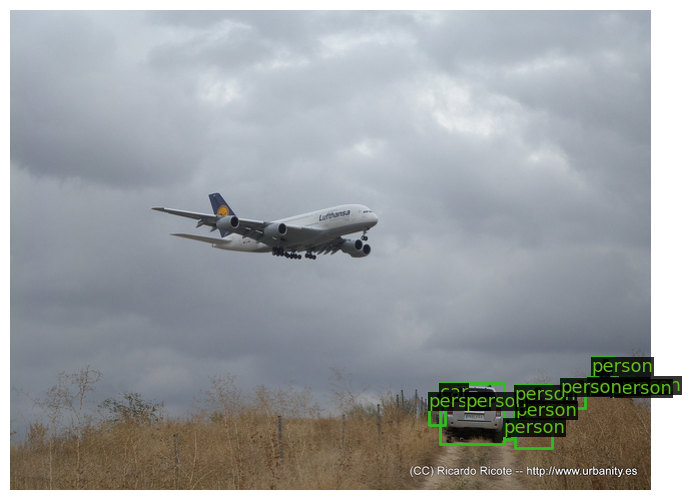

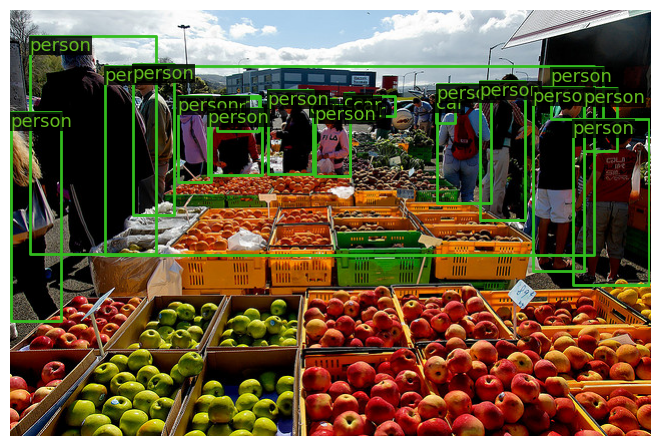

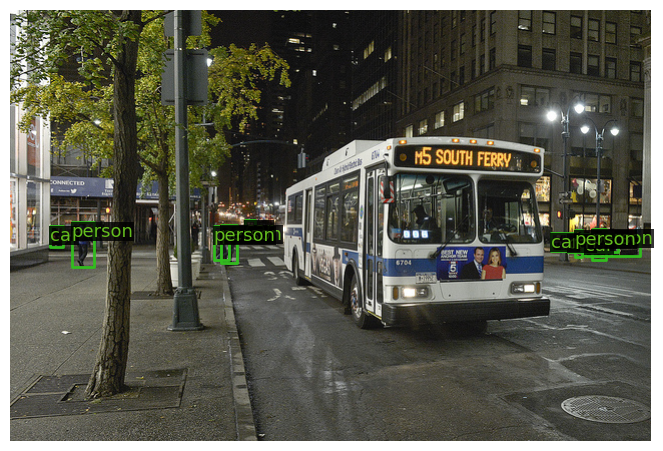

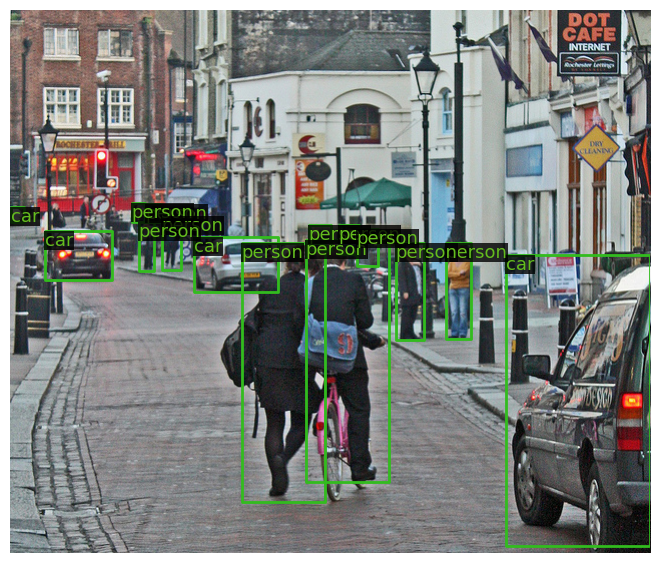

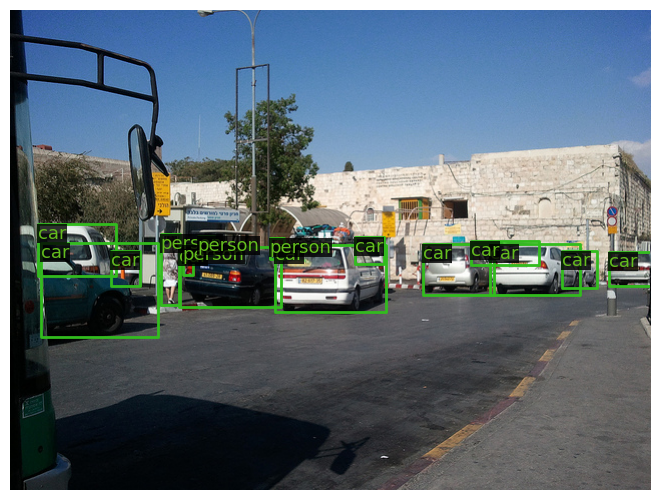

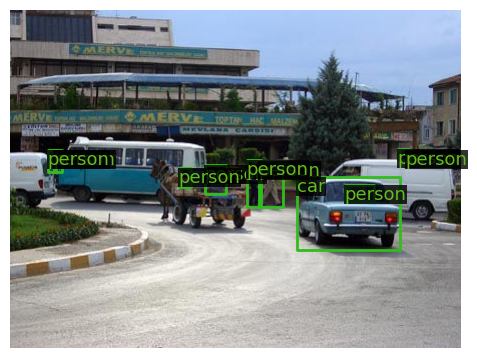

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


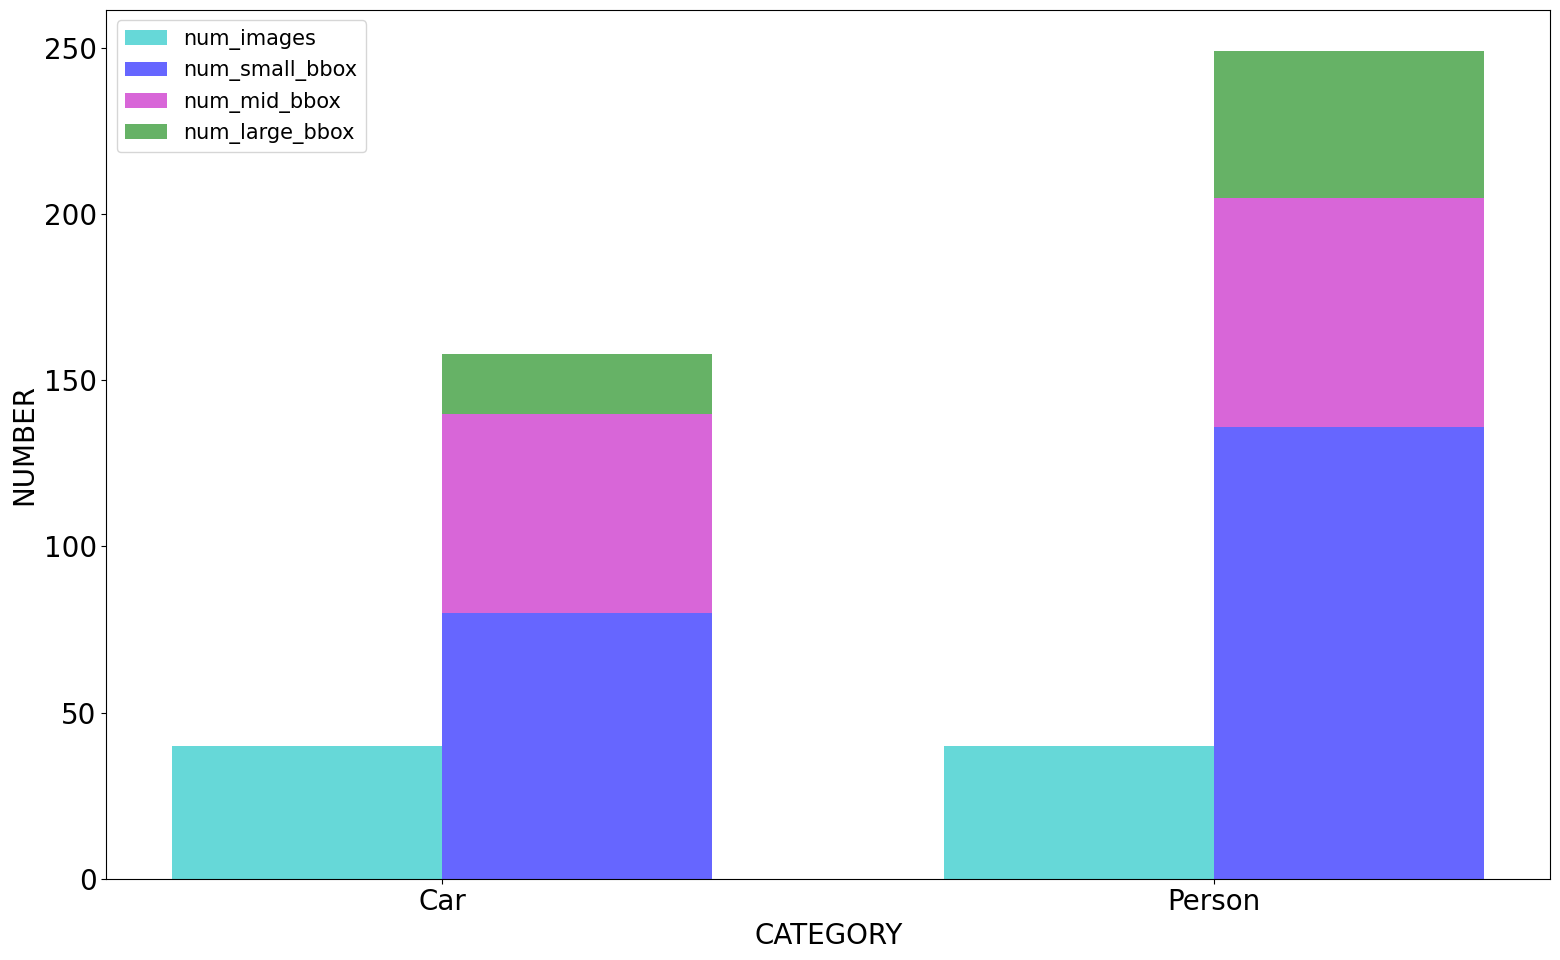

In [7]:
if num_categories > 4:
  cat_nms = nms_categories[0:4]
else:
  cat_nms = nms_categories
utils.show_annotation(path_to_anno_mixedDatasets, cat_nms, show_num=6)
utils.show_cat_distribution(path_to_anno_mixedDatasets, cat_nms)

## 2.4 Perform Training & Evaluation on your chosen Object Detection tool

In [8]:
# Training based on the queried MixedDataset
# For more params-setting, please check:
# https://mmdetection.readthedocs.io/en/latest/
%run tools/train.py {path_to_config} \
--cfg-options model.bbox_head.num_classes={num_categories} \
train_dataloader.dataset.metainfo.classes="$nms_categories" val_dataloader.dataset.metainfo.classes="$nms_categories"

01/13 15:19:05 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 900011255
    GPU 0,1: Tesla V100-PCIE-16GB
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.1, V12.1.105
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.1+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode;arch=com

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


01/13 15:19:24 - mmengine - INFO - Exp name: fcos_visionKG_20250113_151904
01/13 15:19:24 - mmengine - INFO - Epoch(train) [1][20/20]  base_lr: 3.3333e-03 lr: 3.3333e-03  eta: 0:01:13  time: 0.5220  data_time: 0.0271  memory: 3136  grad_norm: 6.8939  loss: 1.5429  loss_cls: 0.6381  loss_bbox: 0.3147  loss_centerness: 0.5901
01/13 15:19:24 - mmengine - INFO - Saving checkpoint at 1 epochs
01/13 15:19:27 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.343
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.595
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.362
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.243
 Average Precision  